### WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key 

# Empty list to hold city information
city_list = []

# city counter
city_count = 1

# for loop to check all cities
for i, city in enumerate(cities):

    # City URL to check
    city_url = url + "&q=" + city
    
    # print somthing to make sure its working
    print("City %s = %s" % (city_count, city))

    # increase city count
    city_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_list.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If no city found
    except:
        print("No city found.")
        pass       
        

City 1 = amderma
No city found.
City 2 = qaanaaq
City 3 = mahebourg
City 4 = kurilsk
City 5 = bang yai
City 6 = champerico
City 7 = toliary
No city found.
City 8 = pevek
City 9 = rikitea
City 10 = bukachacha
City 11 = waddan
City 12 = tuatapere
City 13 = ushuaia
City 14 = taolanaro
No city found.
City 15 = cockburn town
City 16 = mnogovershinnyy
City 17 = albany
City 18 = hilo
City 19 = busselton
City 20 = new norfolk
City 21 = hobart
City 22 = bosaso
City 23 = cherskiy
City 24 = morondava
City 25 = vaini
City 26 = santo angelo
City 27 = punta arenas
City 28 = grand gaube
City 29 = cabo san lucas
City 30 = bredasdorp
City 31 = mataura
City 32 = castro
City 33 = santa cruz
City 34 = aasiaat
City 35 = shimoda
City 36 = pisco
City 37 = iqaluit
City 38 = savelugu
City 39 = attawapiskat
No city found.
City 40 = yellowknife
City 41 = tiksi
City 42 = ambon
City 43 = gamboma
City 44 = comodoro rivadavia
City 45 = west bay
City 46 = rawson
City 47 = bethel
City 48 = alihe
City 49 = kandrian
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# make list into a dataframe
city_df = pd.DataFrame(city_list)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.48,-69.36,272.75,82,0,2.11,GL,1599069762
1,mahebourg,-20.41,57.70,294.15,88,40,2.10,MU,1599069762
2,kurilsk,45.23,147.88,287.21,89,30,4.57,RU,1599069762
3,bang yai,13.84,100.36,304.26,78,20,3.10,TH,1599069762
4,champerico,14.30,-91.92,304.15,66,20,4.10,GT,1599069762


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# cities where humidity is 100% or more.
high_humidity = city_df[(city_df["Humidity"] > 100)]                                  
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Graph for Laitiude against Maximum Temperature
latitude = city_df["Lat"]
max_temp = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

## Latitude vs. Temperature Plot

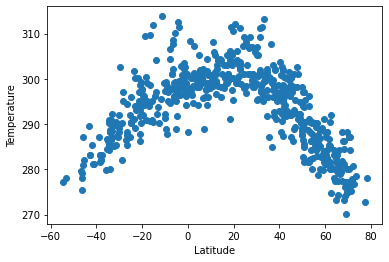

In [14]:
# Graph for Laitiude against Maximum Temperature
latitude = city_df["Lat"]
max_temp = city_df["Max Temp"]

plt.scatter(latitude, max_temp, marker="o")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

# save to output folder
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

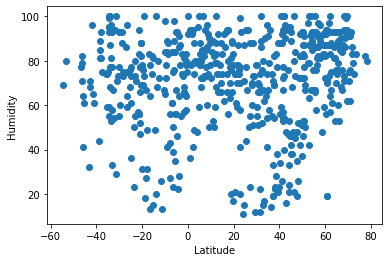

In [15]:
# Graph for Laitiude against Humidity
latitude = city_df["Lat"]
humidity = city_df["Humidity"]

plt.scatter(latitude, humidity,marker="o")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# save to output folder
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

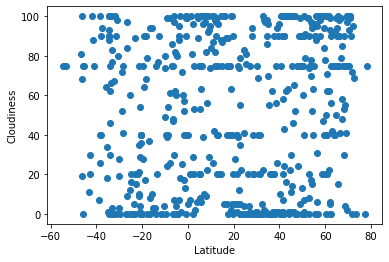

In [16]:
# Graph for Laitiude against Cloudiness
latitude = city_df["Lat"]
cloudiness = city_df["Cloudiness"]

plt.scatter(latitude, cloudiness, marker="o")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# save to output folder
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

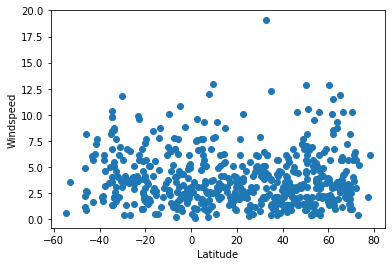

In [17]:
# Graph for Laitiude against Windspeed
latitude = city_df["Lat"]
windspeed = city_df["Wind Speed"]

plt.scatter(latitude, windspeed, marker="o")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")

# save to output folder
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

In [19]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.48,-69.36,272.75,82,0,2.11,GL,1599069762
2,kurilsk,45.23,147.88,287.21,89,30,4.57,RU,1599069762
3,bang yai,13.84,100.36,304.26,78,20,3.10,TH,1599069762
4,champerico,14.30,-91.92,304.15,66,20,4.10,GT,1599069762
5,pevek,69.70,170.31,275.03,91,97,2.53,RU,1599069490


In [20]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mahebourg,-20.41,57.70,294.15,88,40,2.10,MU,1599069762
6,rikitea,-23.12,-134.97,294.08,80,89,9.92,PF,1599069763
9,tuatapere,-46.13,167.68,278.04,79,100,2.66,NZ,1599069764
10,ushuaia,-54.80,-68.30,277.15,69,75,0.62,AR,1599069529
15,busselton,-33.65,115.33,286.48,53,100,5.48,AU,1599069765


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    
    


The r-squared is: 0.6218029957256844


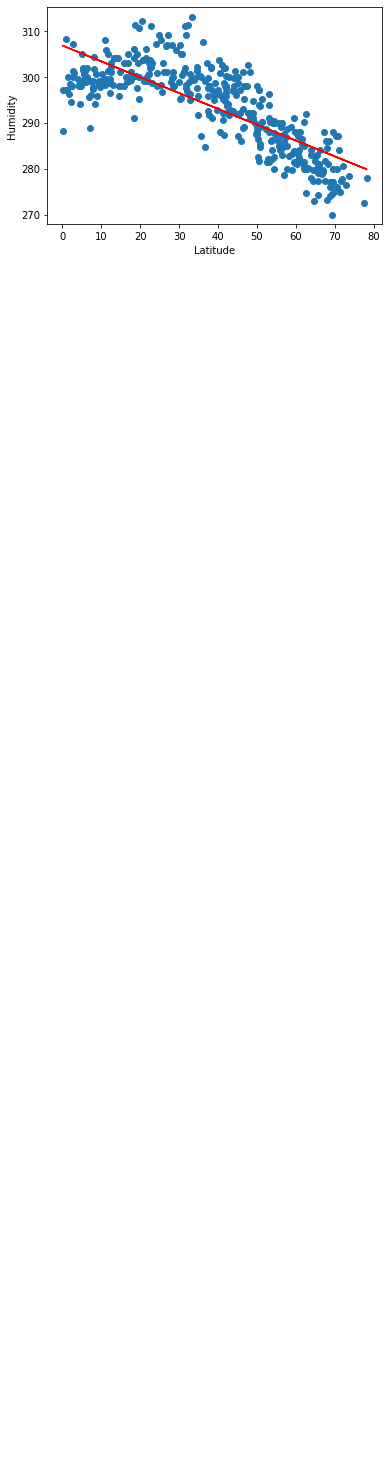

In [64]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Humidity',(0,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.599298894577839


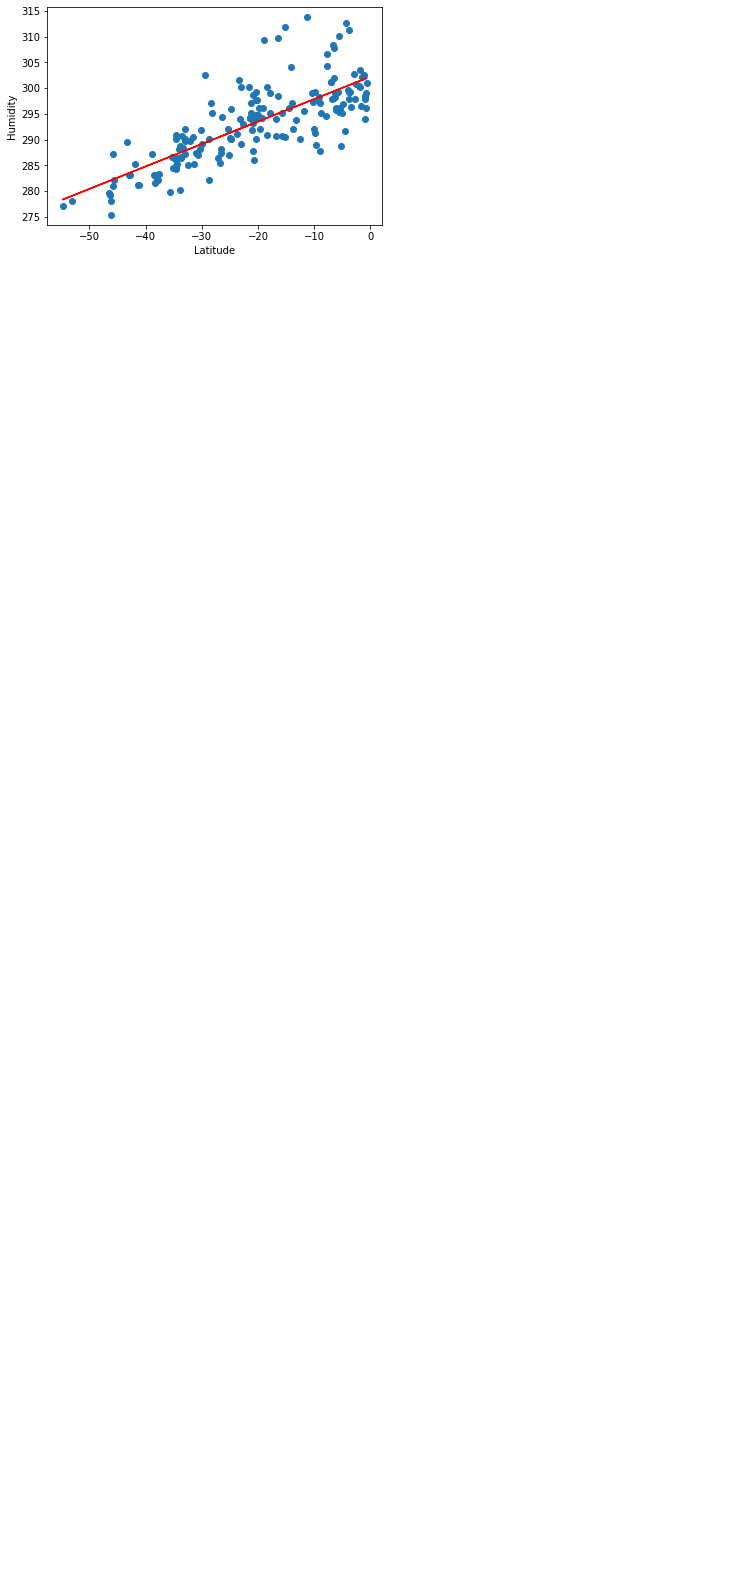

In [65]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00467207644580236


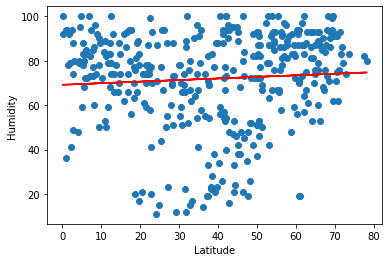

In [68]:
# Northern Hemisphere Humidity vs Lat
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(0,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01404339541151751


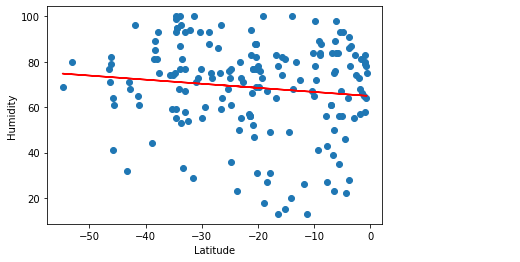

In [70]:
# Southern Hemisphere Humidity vs Lat
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (0, 0))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010272807881664271


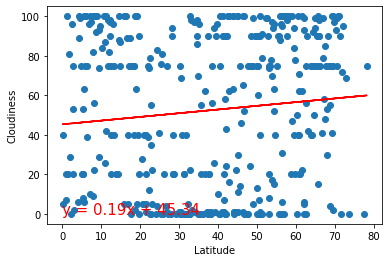

In [71]:
# Northern Hemisphere Cloudiness vs Lat
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (0,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002655006555601724


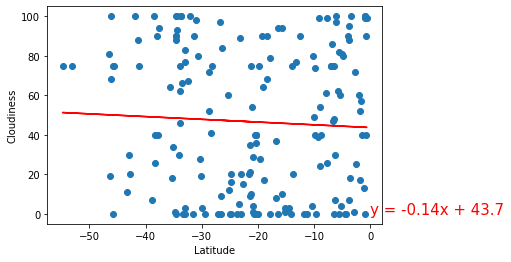

In [72]:
# Southern Hemisphere Cloudiness vs Lat
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (0,0))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002407559774734427


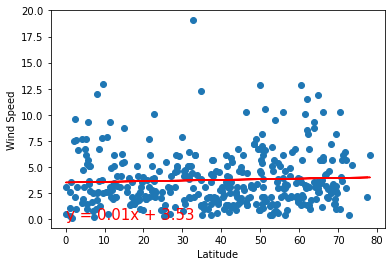

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (0,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01003373234961034


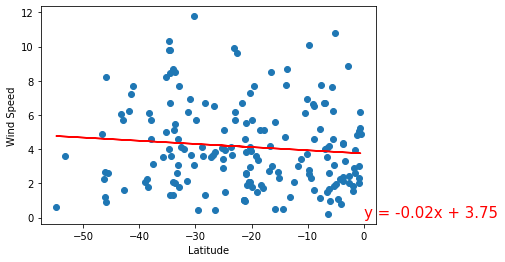

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (0, 0))